In [58]:
pwd

'/mmfs1/data/aglinska/BC-ABCD-ADHD'

In [59]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [60]:
df_rsa = pd.read_csv('df_rsa.csv')
df_rsa

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,src_subject_id,subjectkey,interview_age,sex,eventname,mri_info_deviceserialnumber,scannerID,IQ,sumSympt
0,0,0,8,NDAR_INV0VXEC29A,NDAR_INV0VXEC29A,125,F,baseline_year_1_arm_1,HASH5ac2b20b,1,19.0,17
1,1,1,20,NDAR_INVXWXUUU18,NDAR_INVXWXUUU18,109,M,baseline_year_1_arm_1,HASH69f406fa,2,20.0,9
2,2,2,70,NDAR_INVZ4NNCTMH,NDAR_INVZ4NNCTMH,125,F,baseline_year_1_arm_1,HASH1314a204,3,18.0,10
3,3,3,75,NDAR_INVKT7E0NA1,NDAR_INVKT7E0NA1,131,M,baseline_year_1_arm_1,HASH4b0b8b05,4,17.0,18
4,4,4,78,NDAR_INV20CZ5PTX,NDAR_INV20CZ5PTX,130,M,baseline_year_1_arm_1,HASHdb2589d4,5,13.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...
5007,5007,5007,18302,NDAR_INV1EGW0J5N,NDAR_INV1EGW0J5N,109,M,baseline_year_1_arm_1,HASHb640a1b8,7,20.0,0
5008,5008,5008,18304,NDAR_INV2F729N9A,NDAR_INV2F729N9A,117,F,baseline_year_1_arm_1,HASHc3bf3d9c,16,20.0,0
5009,5009,5009,18305,NDAR_INVMAW066K7,NDAR_INVMAW066K7,120,F,baseline_year_1_arm_1,HASH96a0c182,10,21.0,0
5010,5010,5010,18314,NDAR_INV5DJB8FFX,NDAR_INV5DJB8FFX,114,F,baseline_year_1_arm_1,HASH5ac2b20b,1,19.0,0


In [61]:
fn = './Data/ABCD-behav/abcd_ksad01.csv'
df = pd.read_csv(fn,low_memory=False)
df.iloc[1::]

df = df.iloc[df['eventname'].values=='baseline_year_1_arm_1']
print(df.shape)
df.head()

(10522, 964)


,Unnamed: 0,collection_id,abcd_ksad01_id,dataset_id,subjectkey,src_subject_id,interview_date,interview_age,sex,eventname,...,ksads_25_315_p,ksads_25_316_p,ksads_25_317_p,ksads_25_32_p,ksads_25_33_p,ksads_25_318_p,ksads_25_319_p,ksads_timestamp_p,ksads_duration_p,collection_title
1,1,2573,198253,47427,NDAR_INV7JERJG3Z,NDAR_INV7JERJG3Z,09/09/2018,122,F,baseline_year_1_arm_1,...,555,555,555,555,555,555,555,9/9/18 1:00,18928.0,Adolescent Brain Cognitive Development Study (...
15,15,2573,208814,47427,NDAR_INVGZMP9AHJ,NDAR_INVGZMP9AHJ,01/19/2018,122,M,baseline_year_1_arm_1,...,555,555,555,555,555,555,555,1/19/18 9:30,44.0,Adolescent Brain Cognitive Development Study (...
16,16,2573,207387,47427,NDAR_INVHPVR3UVC,NDAR_INVHPVR3UVC,12/29/2017,119,F,baseline_year_1_arm_1,...,555,555,555,555,555,555,555,12/29/17 10:29,58.0,Adolescent Brain Cognitive Development Study (...
18,18,2573,196001,47427,NDAR_INV5MJHVEB8,NDAR_INV5MJHVEB8,09/24/2017,108,F,baseline_year_1_arm_1,...,555,555,555,555,555,555,555,9/24/17 2:48,78.0,Adolescent Brain Cognitive Development Study (...
28,28,2573,193864,47427,NDAR_INV3NABWF15,NDAR_INV3NABWF15,04/05/2018,115,M,baseline_year_1_arm_1,...,555,555,555,555,555,555,555,4/5/18 10:47,17.0,Adolescent Brain Cognitive Development Study (...


In [62]:
## Inattention Subtype:  At least 6 of the following are met:
inatt_vec1 = pd.to_numeric(df['ksads_14_394_p'][0::]).isin([1]) # Careless mistakes
inatt_vec2 = pd.to_numeric(df['ksads_14_76_p'][0::]).isin([1]) # Difficulty sustaining attention
inatt_vec3 = pd.to_numeric(df['ksads_14_395_p'][0::]).isin([1]) # Doesnt listen 
inatt_vec4 = pd.to_numeric(df['ksads_14_396_p'][0::]).isin([1]) # Diffulty folllowing instructions

inatt_vec5 = pd.to_numeric(df['ksads_14_397_p'][0::]).isin([1]) # Symptom - Difficulty organizing tasks Present
inatt_vec6 = pd.to_numeric(df['ksads_14_398_p'][0::]).isin([1]) #  Symptom - Avoids tasks requiring attention Present

inatt_vec7 = pd.to_numeric(df['ksads_14_399_p'][0::]).isin([1]) # Often loses things Present
inatt_vec8 = pd.to_numeric(df['ksads_14_80_p'][0::]).isin([1]) # Easily distracted
inatt_vec9 = pd.to_numeric(df['ksads_14_400_p'][0::]).isin([1]) # Forgetful in daily activities

inatt_vec_stacked = np.vstack(
    (inatt_vec1.values,
inatt_vec2.values,
inatt_vec3.values,
inatt_vec4.values,
inatt_vec5.values,
inatt_vec6.values,
inatt_vec7.values,
inatt_vec8.values,
inatt_vec9.values)
)

(inatt_vec_stacked.sum(axis=0)>=6).sum()

/scratch/aglinska/ipykernel_1932860/3974047004.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  inatt_vec1 = pd.to_numeric(df['ksads_14_394_p'][0::]).isin([1]) # Careless mistakes
/scratch/aglinska/ipykernel_1932860/3974047004.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  inatt_vec2 = pd.to_numeric(df['ksads_14_76_p'][0::]).isin([1]) # Difficulty sustaining attention
/scratch/aglinska/ipykernel_1932860/3974047004.py:4: FutureWarning: The behavior of `series[i:j]` with an

904

In [63]:
hyperact_vec1 = pd.to_numeric(df['ksads_14_401_p'][0::]).isin([1]) # Fidgets
hyperact_vec2 = pd.to_numeric(df['ksads_14_84_p'][0::]).isin([1]) # Symptom - Difficulty remaining seated Present
hyperact_vec3 = pd.to_numeric(df['ksads_14_402_p'][0::]).isin([1]) # Symptom - Runs or climbs excessively Present
hyperact_vec4 = pd.to_numeric(df['ksads_14_403_p'][0::]).isin([1]) # Symptom - Acts like driven by a motor Present

hyperact_vec5 = pd.to_numeric(df['ksads_14_404_p'][0::]).isin([1]) # Symptom - Difficulty playing quietly Present
hyperact_vec6 = pd.to_numeric(df['ksads_14_405_p'][0::]).isin([1]) # Symptom - Blurts out answers Present

hyperact_vec7 = pd.to_numeric(df['ksads_14_406_p'][0::]).isin([1]) # Symptom - Difficulty waiting turn Present
hyperact_vec8 = pd.to_numeric(df['ksads_14_407_p'][0::]).isin([1]) # Symptom - Often Interrupts or intrudes on others Present
hyperact_vec9 = pd.to_numeric(df['ksads_14_408_p'][0::]).isin([1]) # Symptom - Often talks excessively Present

hyperact_vec_stacked = np.vstack(
    (hyperact_vec1.values,
    hyperact_vec2.values,
    hyperact_vec3.values,
    hyperact_vec4.values,
    hyperact_vec5.values,
    hyperact_vec6.values,
    hyperact_vec7.values,
    hyperact_vec8.values,
    hyperact_vec9.values)
)

(hyperact_vec_stacked.sum(axis=0)>=6).sum()

/scratch/aglinska/ipykernel_1932860/546702663.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  hyperact_vec1 = pd.to_numeric(df['ksads_14_401_p'][0::]).isin([1]) # Fidgets
/scratch/aglinska/ipykernel_1932860/546702663.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  hyperact_vec2 = pd.to_numeric(df['ksads_14_84_p'][0::]).isin([1]) # Symptom - Difficulty remaining seated Present
/scratch/aglinska/ipykernel_1932860/546702663.py:3: FutureWarning: The behavior of `series[i:j]` 

550

In [64]:
df_sympt = pd.DataFrame()
df_sympt['subjectkey'] = df['subjectkey'].values

symptmat = np.vstack((inatt_vec_stacked,hyperact_vec_stacked))
df_sympt['sumSympt'] = symptmat.sum(axis=0)

df_sympt = df_sympt.iloc[(df_sympt['subjectkey'].isin(df_rsa['subjectkey']).values)]

df_sympt.head()

,subjectkey,sumSympt
0,NDAR_INV7JERJG3Z,17
3,NDAR_INV5MJHVEB8,0
5,NDAR_INV36E4JVZ2,0
6,NDAR_INVKDZKAC4L,0
7,NDAR_INVCR43W7MR,0


(array([ 65.,  65.,  73.,  81., 109., 210.,  97.,  90.,  82., 139.]),
 array([ 6. ,  7.2,  8.4,  9.6, 10.8, 12. , 13.2, 14.4, 15.6, 16.8, 18. ]),
 <BarContainer object of 10 artists>)

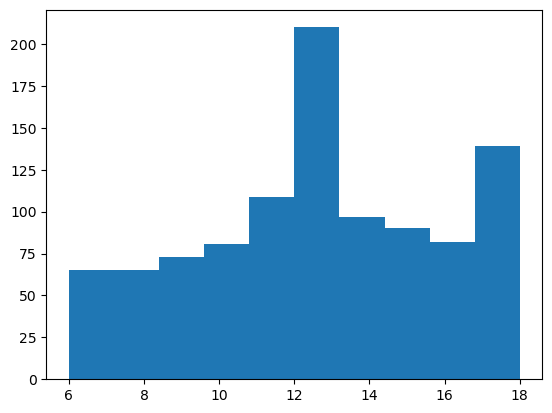

In [65]:
plt.hist(df_sympt['sumSympt'].values[df_sympt['sumSympt'].values>0])

In [66]:
df_rsa['sumSympt'] = [df_sympt.iloc[df_sympt['subjectkey'].values==df_rsa['subjectkey'].values[i]]['sumSympt'].values[0] for i in range(df_rsa.shape[0])]

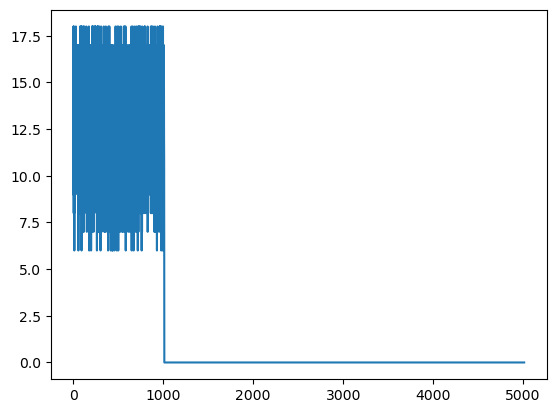

In [67]:
plt.plot(df_rsa['sumSympt'].values)

In [74]:
df_rsa['sexID'] = (df_rsa['sex'].values=='M')+1

In [80]:
df_rsa = df_rsa[['subjectkey','eventname', 'interview_age', 'sex','sexID','mri_info_deviceserialnumber', 'scannerID', 'IQ', 'sumSympt']]

In [81]:
df_rsa.to_csv('df_rsa.csv')